In [1]:
import matplotlib.pyplot as plt
import pandas as pd

/var/folders/dz/c1ljqqvn6rgcgs2xp0p3kfxc0000gn/T/ipykernel_40017/1505719282.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the penguins dataset
data = pd.read_csv("penglings.csv")

# Drop rows with 'nan' values in the specified columns
columns_to_check = ['flipper_length_mm', 'body_mass_g', 'bill_length_mm']
data = data.dropna(subset=columns_to_check)

/var/folders/dz/c1ljqqvn6rgcgs2xp0p3kfxc0000gn/T/ipykernel_40017/1484315480.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["sizes"].fillna(0, inplace=True)  # Replace NaN with 0


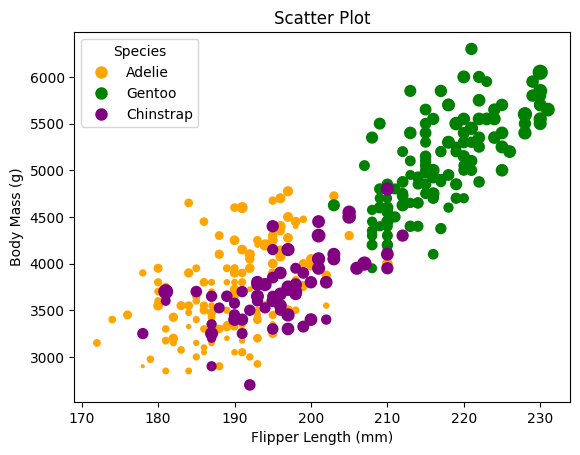

In [3]:
# Normalize the bill length
min_bill_length = data["bill_length_mm"].min()
max_bill_length = data["bill_length_mm"].max()
data["normalized_bill_length"] = (data["bill_length_mm"] - min_bill_length) / (max_bill_length - min_bill_length)
data["scaled_sizes"] = data["normalized_bill_length"]

# This step is really important; otherwise, always show sizes nan should be an integer
data["sizes"] = data["scaled_sizes"]

# Replace NaN values in 'sizes' with a default value (0)
data["sizes"].fillna(0, inplace=True)  # Replace NaN with 0

# Create scatter plot using Matplotlib
colors = {'Adelie': 'orange', 'Gentoo': 'green', 'Chinstrap': 'purple'}

plt.scatter(data['flipper_length_mm'], data['body_mass_g'], c=data['species'].map(colors), s=data['sizes'] * 100)

# Customize the plot
plt.title('Scatter Plot')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Create a legend
legend_labels = {species: plt.Line2D([0], [0], marker='o', color='w', label=species,
                                      markerfacecolor=colors[species], markersize=10)
                 for species in data['species'].unique()}
plt.legend(handles=legend_labels.values(), title='Species')

# Show the plot
plt.show()